<h3> Loading the libraries <h3>

In [1]:

import matplotlib.pyplot as plt # type: ignore
import pandas as pd# type: ignore
import statsmodels.api as sm# type: ignore
import numpy as np
import pandas as pd

<h3> Reading tab seperated data into dataframe, then making a sublists of a list, where list,  <br>  contains the products, ans sublist, the price of the product id over time <h3>

In [2]:
data = np.genfromtxt('products.csv', delimiter='\t', dtype=None, encoding=None)
df = pd.DataFrame(data)
df.head()
l=[]
sub_l=[]
for  row in range (1,len(df)):
   sub_l=[]
   for  column in range(1,len(df.columns)):
      sub_l.append(df[column][row])
      sub_l[len(sub_l)-1]  = sub_l[len(sub_l)-1].replace('"','') # the  value of the producs in the last time seris included " so we are removing it
   l.append(sub_l)  

l.remove(l[939])    # the product 939 had nan value, so it was removed
for i in range(len(l)):
   try:
      l[i] =  [int(item) for item  in l[i]]
   except:
      print('There was a error')  
      print(i) 
      print(l[i])
      continue

# here we are eliminating the  product  whose zero values dominates the  list, so   it does not make sense to make predictions on them
new_list=[]
for item in l :
   if item.count(0)  <  0.5*len(item):
    new_list.append(item)


print(df[0][10])
print(df[0][8])



"TE01596
"TE01281


<h3> Plotting how first 20 product prices changed over time <h3>

/var/folders/h4/kdky5skx0jggltns31j4zj7r0000gn/T/ipykernel_1201/385474763.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 3))


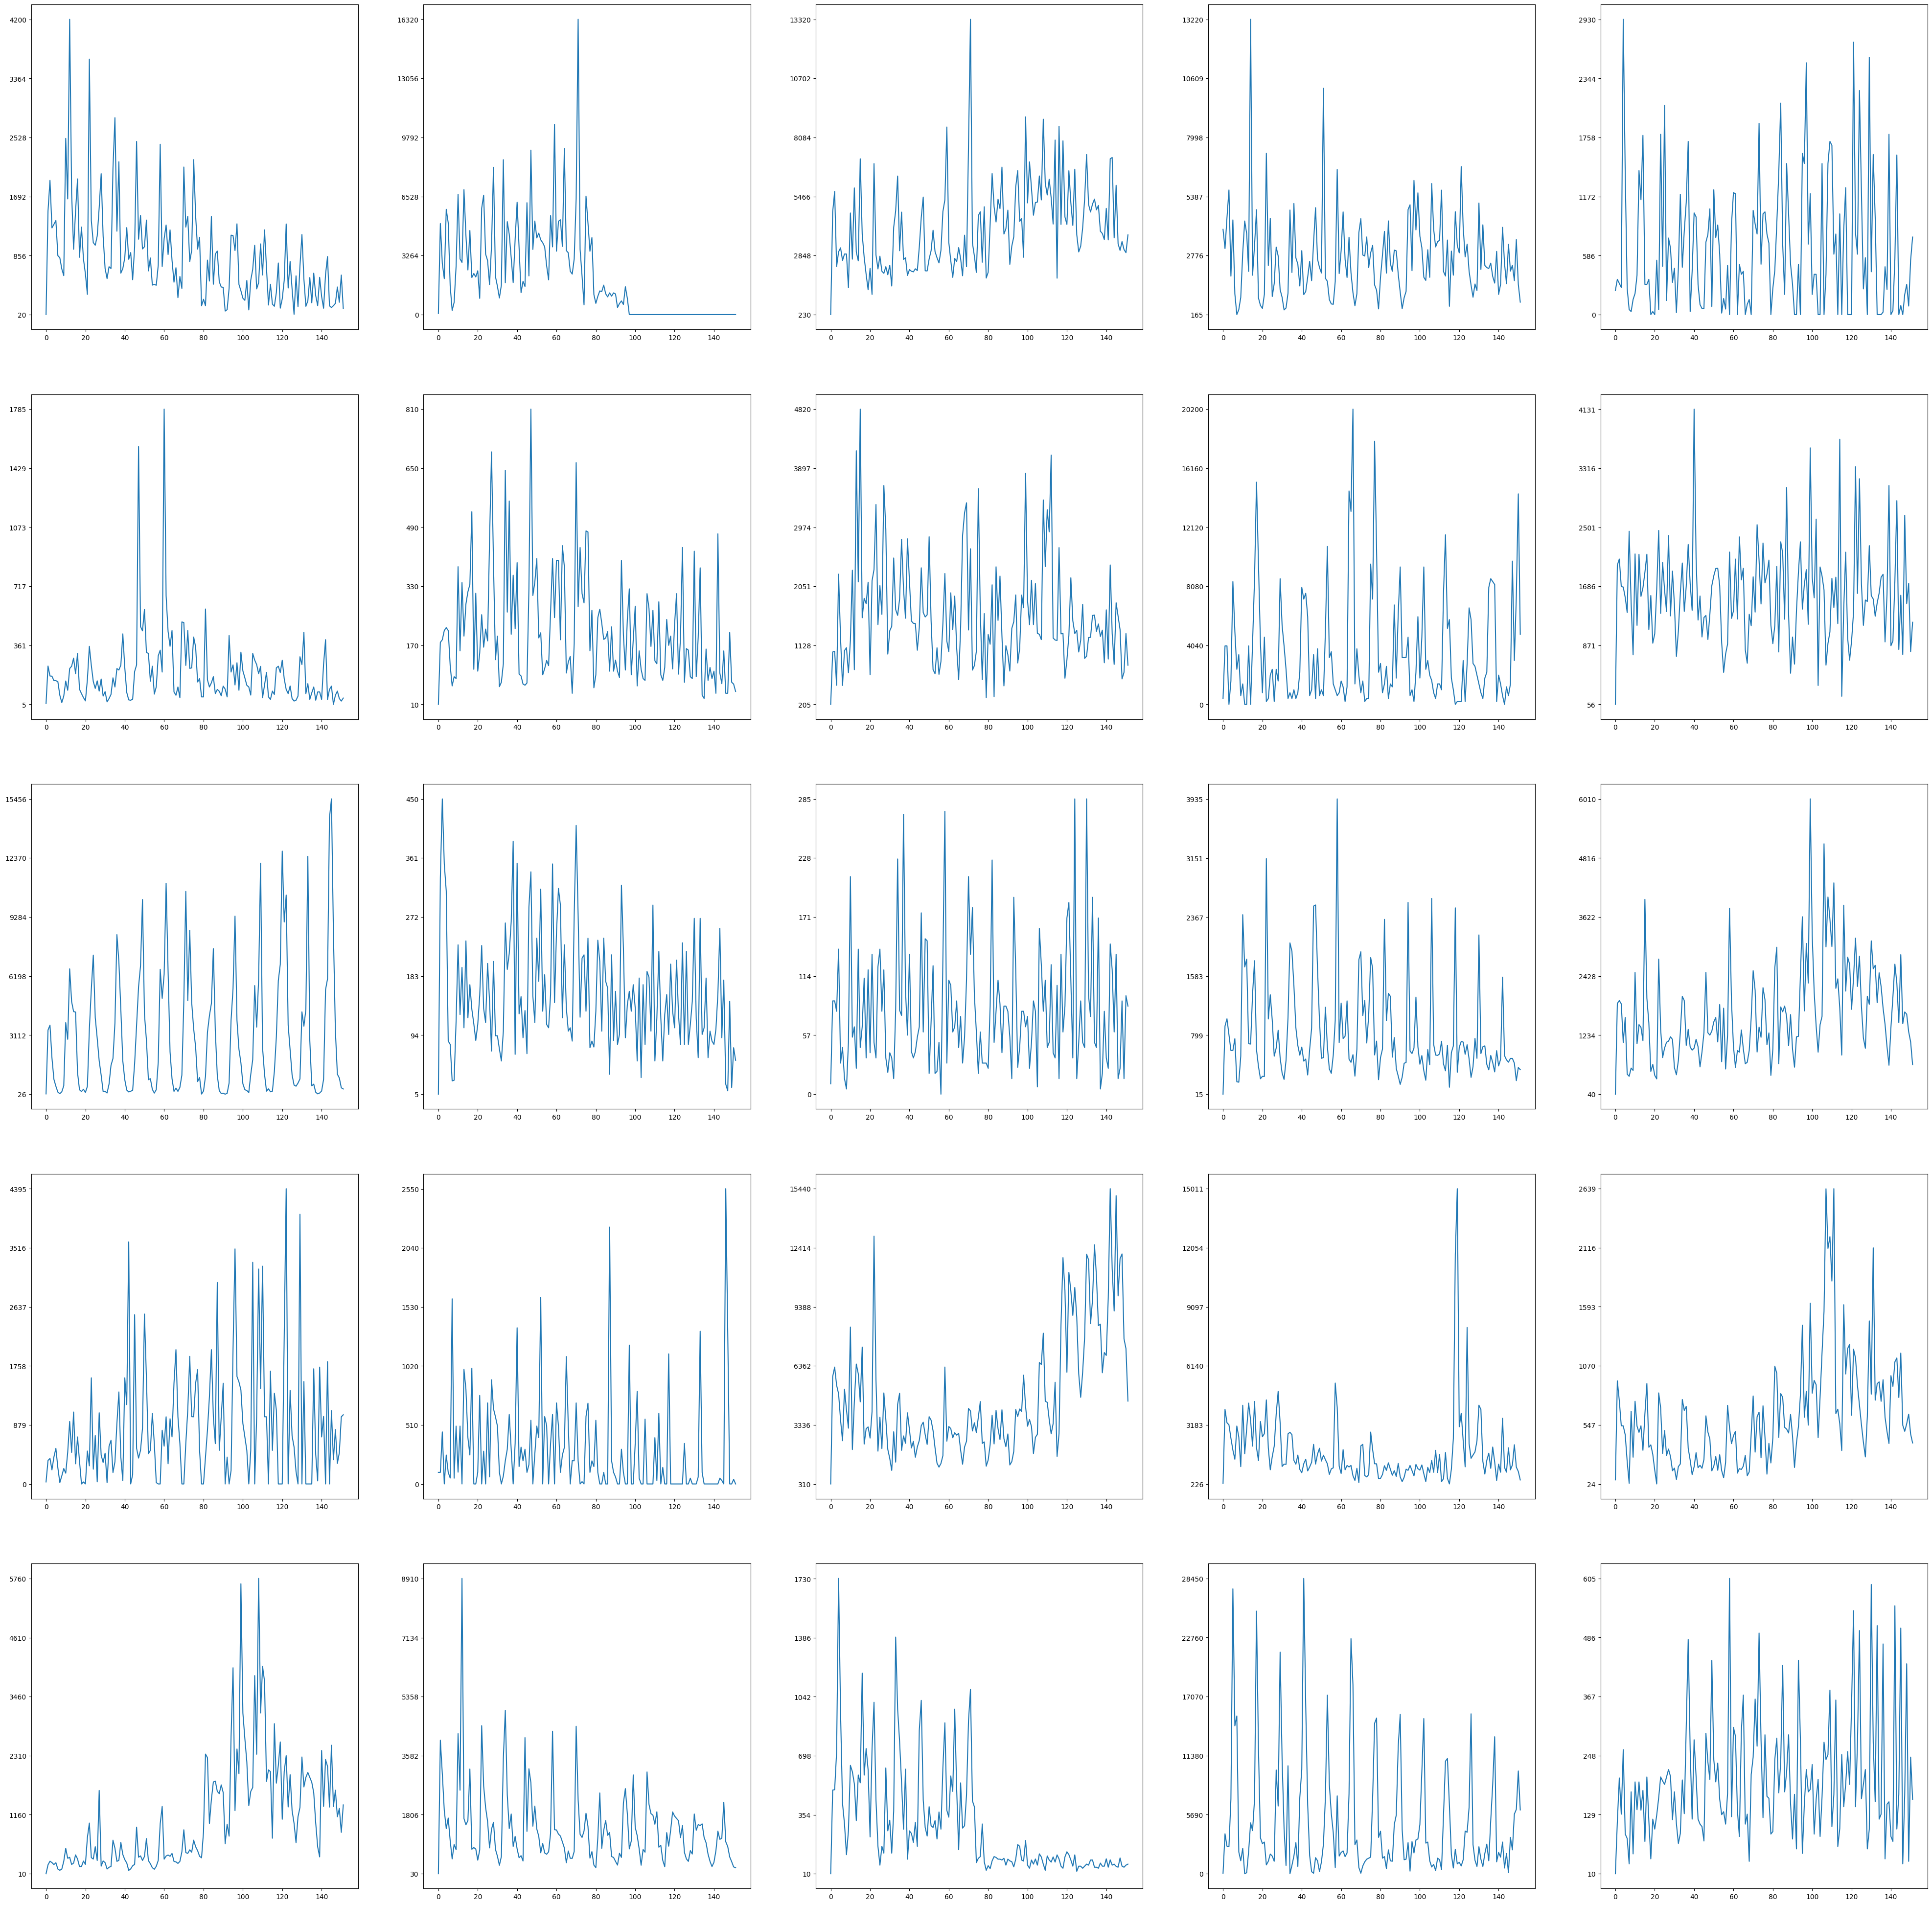

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

In [3]:

fig, axs = plt.subplots(5, 5, figsize=(50, 50))  # Adjust figsize as necessary
# Flatten the axes array for easy iteration if using a subplot grid
axs = axs.flatten()
for i in range(len(axs)):  # This will correctly iterate over 0 to 15 if len(axs) is 16
    # Only plot if the list l has enough elements
    if i < len(new_list) :
        data_range = max(new_list[i]) - min(new_list[i])
        tick_interval = max(1, int(data_range / 5))  # Divides the range into 5 parts, adjust as needed
        axs[i].plot(new_list[i])
        axs[i].set_yticks(range(min(new_list[i]), max(new_list[i]) + 1, tick_interval))
        plt.figure(figsize=(5, 3))
plt.tight_layout()  # Automatically adjust subplots to fit into figure area
plt.show()


 <h3> Preparing the product TE01281 and  TE01596 data for prediction <h3>

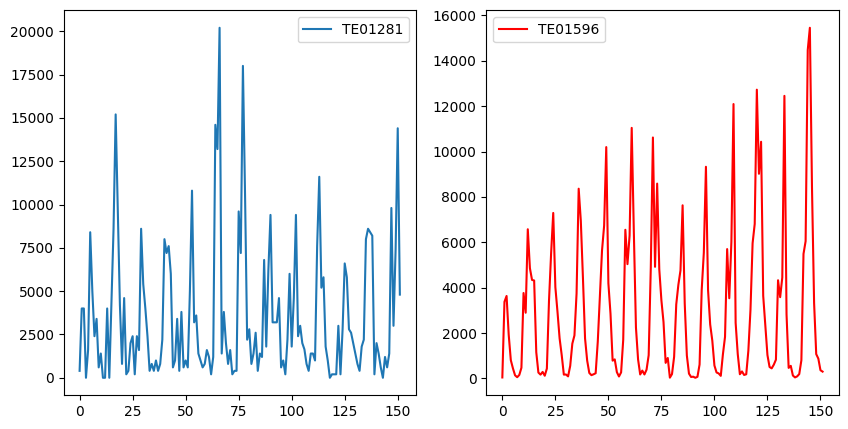

In [4]:

date_range = pd.date_range(start='2010-05', end='2023-1', freq='ME')
product_df = pd.DataFrame(data=new_list[10], index=date_range, columns=['Sales'])
product_df_2=pd.DataFrame(data=new_list[8], index=date_range, columns=['Sales'])
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(new_list[8],label='TE01281')  # First subplot
axes[1].plot(new_list[10],label='TE01596',color='red')  
axes[0].legend()
axes[1].legend()


<h3> Train Test split for products TE01281 and  TE01596

In [5]:
split_percentage = 0.80
split_index = int(len(product_df) * split_percentage)
#TE01596
df_train = product_df.iloc[:split_index]
df_test = product_df.iloc[split_index:]
#TE01281
df_train2 =  product_df_2.iloc[:split_index]
df_test2 = product_df_2.iloc[split_index:]


<h3> PACF AND ACF PLOTS <H3>

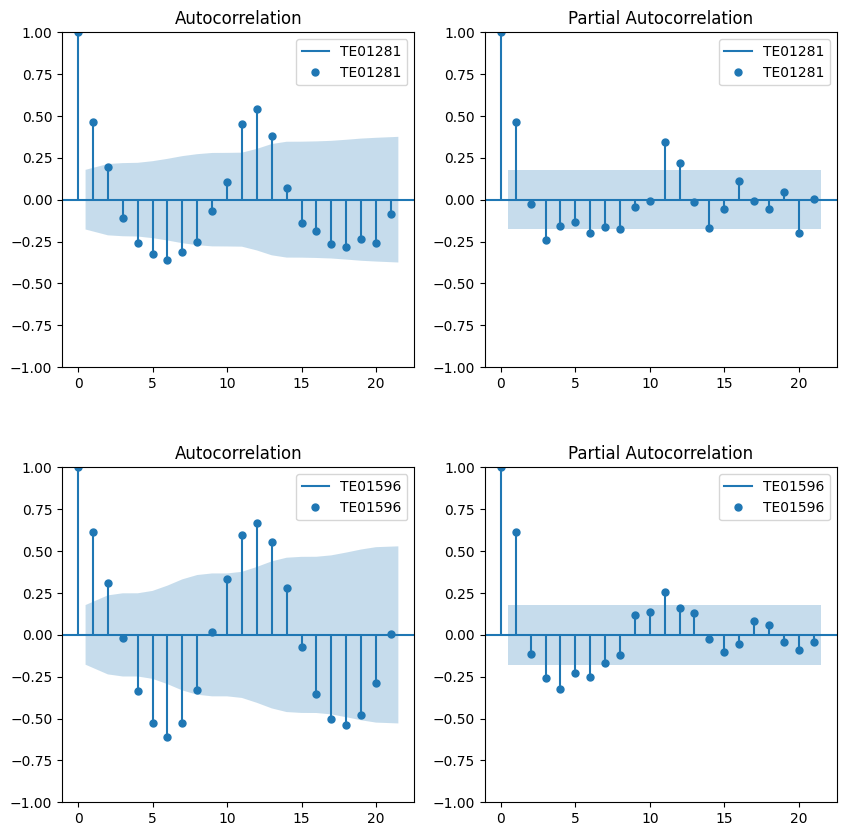

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # type: ignore
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
#TE01281
plot_acf(df_train2,ax=axes[0,0],label = 'TE01281')
plot_pacf(df_train2,ax=axes[0,1],label='TE01281')

#TE01596
plot_acf(df_train,ax=axes[1,0],label='TE01596')
plot_pacf(df_train,ax=axes[1,1],label='TE01596')

plt.subplots_adjust(hspace=0.3) 
axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
plt.show()

<h3> Labeling the column as sales <h3>

In [7]:
#TE01596
df_train.columns = ['Sales']  # Rename the column
df_test.columns=['Sales']

#TE01281
df_train2.columns = ['Sales']  # Rename the column
df_test2.columns=['Sales']



<h3> Fitting the arima model  for product TE01596<h3>

In [8]:
from statsmodels.tsa.arima.model import ARIMA # type: ignore
model = ARIMA (df_train['Sales'],order = (2,0,3))
model_fit =  model.fit()


/Users/parvizpirizade/Documents/stock_price_prediction/stock_predictor/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 <h3> Fitting the arima model for product TE01281<h3>

In [9]:
model_2 = ARIMA (df_train2['Sales'],order = (1,0,3))
model_fit_2 =  model_2.fit()

/Users/parvizpirizade/Documents/stock_price_prediction/stock_predictor/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/parvizpirizade/Documents/stock_price_prediction/stock_predictor/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<h3> Getting forecast for product TE01596 <h3>

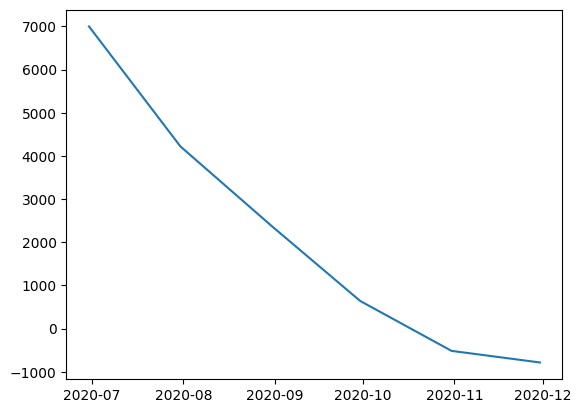

In [10]:
forecast = model_fit.get_forecast(steps=6)
forecast_df = forecast.summary_frame()
plt.plot(forecast_df['mean'])

<h3> Getting forecast for  TE01281 <h3>

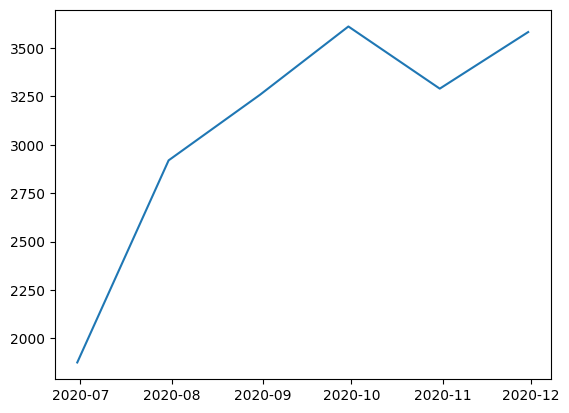

In [11]:
forecast_2 = model_fit_2.get_forecast(steps=6)
forecast_df_2 = forecast_2.summary_frame()
plt.plot(forecast_df_2['mean'])

<h3> Auto Arima parameter finding <h3>

In [12]:
import pmdarima as pm # type: ignore#
#TE01596 
auto_arima = pm.auto_arima(df_train['Sales'],stepwise=False,seasonal=False)
auto_arima

#TE01281
auto_arima2 = pm.auto_arima(df_train2['Sales'],stepwise=False,seasonal=False)
auto_arima2

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

<h3> Plotting residuals graph <h3>

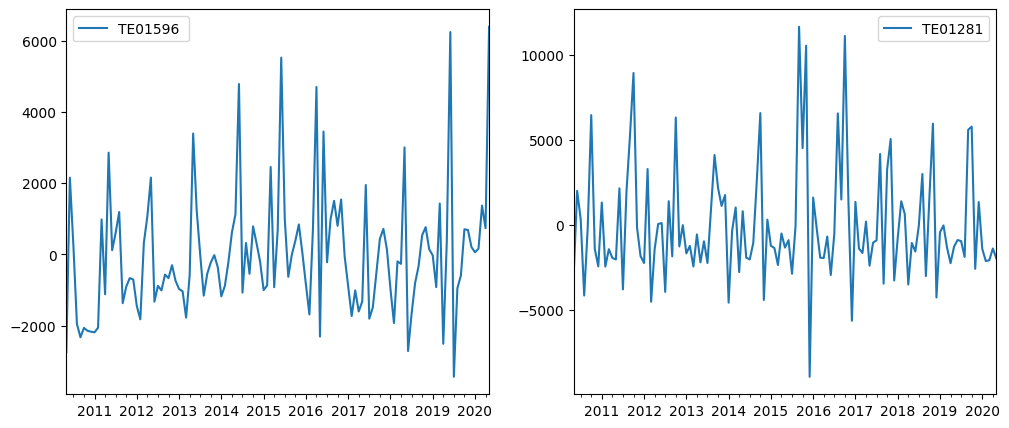

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

residuals = model_fit.resid
residuals.plot(ax=axes[0],label ='TE01596 ')

residuals2 = model_fit_2.resid
residuals2.plot(ax=axes[1],label='TE01281')
axes[0].legend()
axes[1].legend()

<h3> Predicting the training sets  of TE01596  and TEO1281 and  with the model <h3>

In [14]:
#TE01596 
in_sample_pred = model_fit.predict(start=df_train.index[0], end=df_train.index[-1], dynamic=False)
#TEO1281 
in_sample_pred_2 = model_fit_2.predict(start=df_train2.index[0], end=df_train2.index[-1], dynamic=False)

<h3> Plotting the original training set, predicted training set and predicted test set <h3>

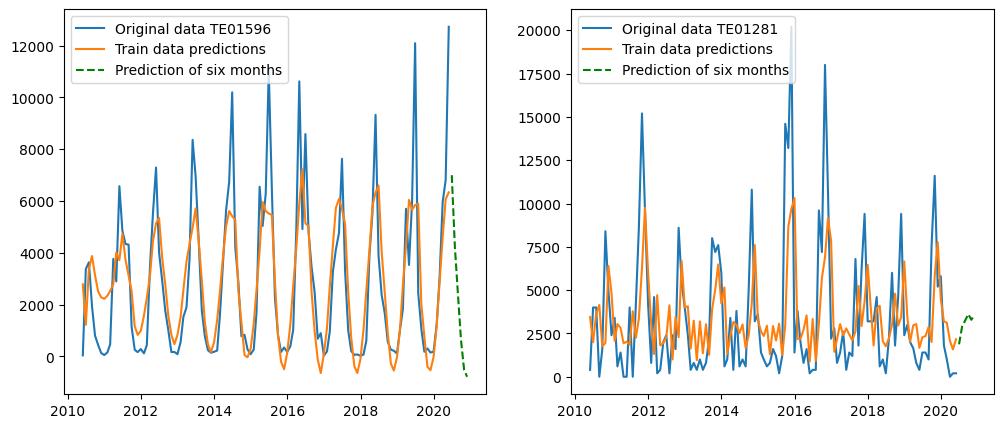

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(df_train['Sales'],label='Original data TE01596')
axes[0].plot(in_sample_pred,label = 'Train data predictions')
axes[0].plot(forecast_df['mean'],label ='Prediction of six months', color='green',linestyle='--')

axes[1].plot(df_train2['Sales'],label='Original data TE01281')
axes[1].plot(in_sample_pred_2,label = 'Train data predictions')
axes[1].plot(forecast_df_2['mean'],label ='Prediction of six months', color='green',linestyle='--')
axes[1].legend()
axes[0].legend()
